### Exemplo: Grid World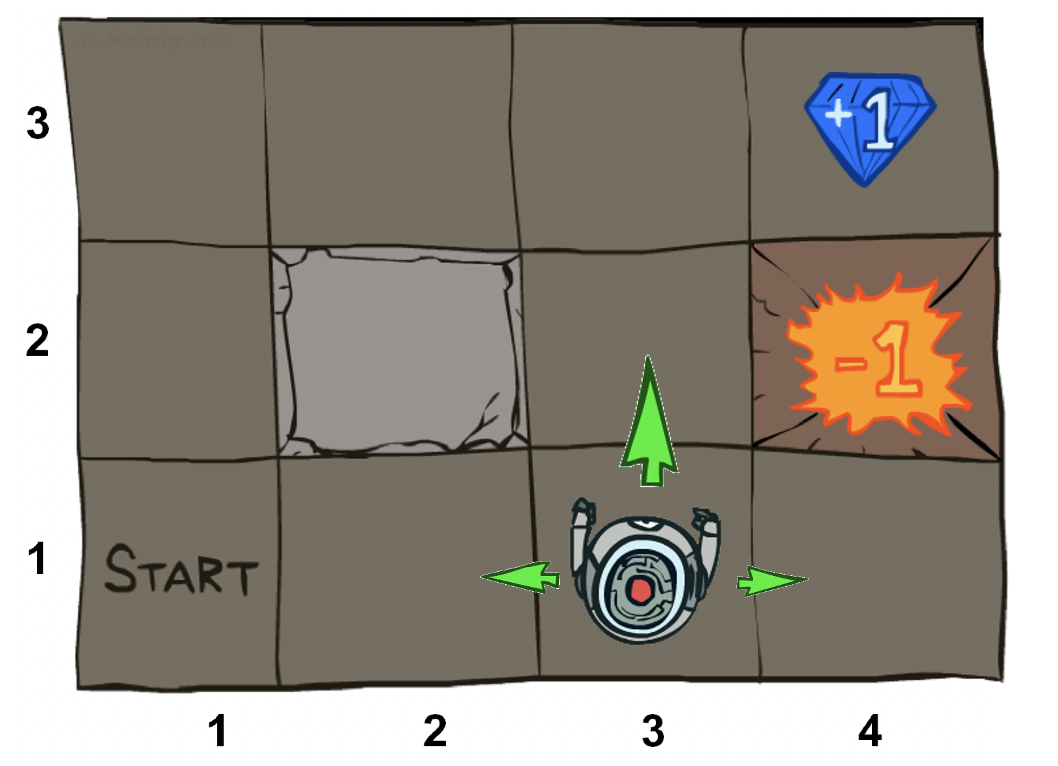

A regra é simples. Seu agente/robô começa no canto inferior esquerdo (o sinal de ‘início’) e termina em +1 ou -1, que é a recompensa correspondente. Em cada etapa, o agente tem 4 ações possíveis, incluindo cima, baixo, esquerda e direita, enquanto o bloco preto é uma parede onde o seu agente não será capaz de penetrar. 

Mostra uma representação de mundo da grade retangular de um MDP finito simples. 
As células da grade correspondem aos estados do meio ambiente. Em cada célula, quatro ações são possíveis: norte, sul, leste e oeste, que deterministicamente fazem com que o agente se mova na célula na respectiva direção da grade.
Ações que tirariam o agente da rede não alteram sua localização, mas também resultam em uma recompensa de -1.
Outras ações resultam em uma recompensa de 0, exceto aquelas que movem o agente para fora dos estados comerciais A e B. 
No estado A, todas as quatro ações geram uma recompensa de +10 e levam o agente para A'. Do estado B, todas as ações render uma recompensa de +5 e levar o agente para B'.

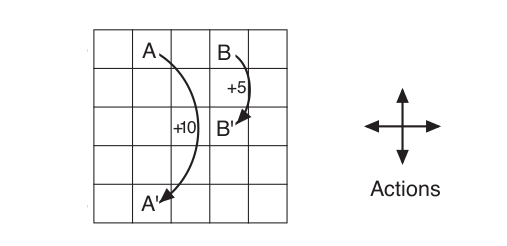

#### Note que o agente não tem conhecimento do ambiente. Ele vai recebendo as informações sensoriais ao explorar o ambiente.

Suponha que a política seja que o agente selecione todas as quatro ações com probabilidade igual em todos os quatro estados. A Figura a seguir mostra essa mesma grade, agora, com as Funções de Valor do Estado para esta política para todos os estados. 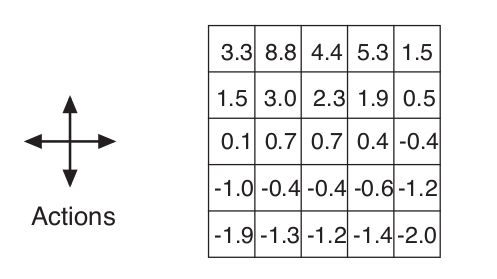


Calculadas usando a seguinte fórmula (para o caso de recompensa com desconto igual a 0,9).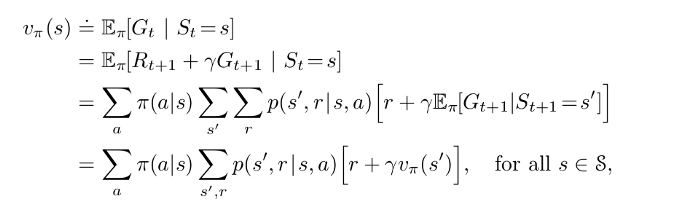

#### Agora, a primeira coisa a fazer é fazer uma grade. Eu usei numpy para fazer uma grade (5,5) com todos os valores inicializados em zero.


In [13]:
import numpy as np

grid = np.zeros((5,5))
grid

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

Agora se vermos que existem 4 tipos diferentes de estados: 

1- O estado A, saindo do qual nos rende +10 de recompensa e depois se move para a célula A '(não importa se vamos para cima, para baixo, para a esquerda ou para a direita).

2- Estado B, saindo do qual nos rende +5 de recompensa e se move para a célula B '(não importa se vamos para cima, para baixo, para a esquerda ou para a direita).

3- Estados dos quais podemos sair da grade. Então, suponha que pegamos a célula (estado) na primeira linha, primeira coluna. Se subirmos desse estado, sairemos da grade. Isso nos renderá uma recompensa de -1 e voltaremos ao estado de onde começamos. 

4- Além de sair de qualquer outra célula (estado), obtemos uma recompensa 0 e passamos para a nova célula.

Portanto, nosso primeiro passo é representar as funções de valor para um determinado estado na grade, o que podemos fazer facilmente indexando esse estado/célula particular. E podemos representar indo para a esquerda, direita, para cima, para baixo simplesmente adicionando ou subtraindo 1 do índice, conforme necessário. No entanto, se ir em qualquer direção nos mover para fora da grade, inicializaremos o valor dessa célula como 0, caso contrário, será o valor da nova célula onde terminarmos.

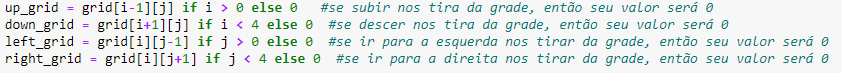

O objetivo é calcular as funções de valor de estado de cada um desses estados onde a política é que haja uma probabilidade igual de mover em qualquer uma das 4 direções. Portanto, agora, se você se lembra, a função de valor de estado de um determinado estado é a recompensa imediata que recebemos mais a função de valor do estado onde terminamos para uma ação particular de acordo com nossa política.

Por exemplo: para a primeira célula na primeira linha e a primeira coluna, abaixo o cálculo:

1- Se subirmos - --> 0,25 * (-1 + 0,9 * 0) = -0,25 #Deixe-me explicar. Uma vez que existe uma probabilidade igual de ir em qualquer uma das direções, então a probabilidade de subir é de 0,25, então -1 é a recompensa imediata que recebemos, pois subir significa que estamos saindo da grade. Visto que sair da grade nos coloca no mesmo estado, então 0 é a função de valor do estado atual. E 0,9 é o caso de recompensa com desconto.

2- Da mesma forma, se formos para a esquerda - --> 0,25 * (- 1 + 0,9 * 0) = -0,25

3- Se formos para a direita - --> 0,25 * (0 + 0,9 * 0) = 0 #Aqui existem apenas duas diferenças. Primeiro, a recompensa imediata é 0, porque ainda estamos dentro da grade depois de ir para a direita. E agora estamos na célula à direita, que tem uma função de valor 0.

4- Da mesma forma, se descermos - --> 0,25 * (0 + 0,9 * 0) = 0

#### Finalmente, adicionamos todos eles

#### v (s) = -0,25 + (-0,25) + 0 + 0 = -0,50

Portanto, agora a função de valor do estado atual, ou seja, primeira linha, primeira coluna é -0,50

Da mesma forma, podemos calcular funções de valor de todos os outros estados.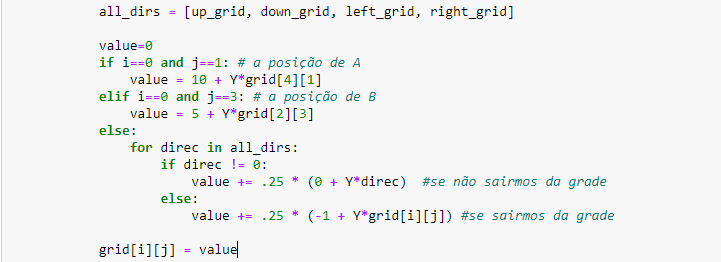

In [10]:
Y = .90  #valor de desconto
for num in range(10): #número de vezes que percorreremos toda a grade
    for i in range(5):      #todas as linhas
        for j in range(5):    #todas as colunas
            up_grid = grid[i-1][j] if i > 0 else 0   #se subir nos tira da grade, então seu valor será 0
            down_grid = grid[i+1][j] if i < 4 else 0  #se descer nos tira da grade, então seu valor será 0
            left_grid = grid[i][j-1] if j > 0 else 0  #se ir para a esquerda nos tirar da grade, então seu valor será 0
            right_grid = grid[i][j+1] if j < 4 else 0  #se ir para a direita nos tirar da grade, então seu valor será 0

            all_dirs = [up_grid, down_grid, left_grid, right_grid]     

            value=0  
            if i==0 and j==1: # a posição de A
                value = 10 + Y*grid[4][1]
            elif i==0 and j==3: # a posição de B           
                value = 5 + Y*grid[2][3]
            else:
                for direc in all_dirs:
                    if direc != 0: 
                        value += .25 * (0 + Y*direc)  #se não sairmos da grade
                    else:
                        value += .25 * (-1 + Y*grid[i][j]) #se sairmos da grade
        
            grid[i][j] = value

Fazemos isso para todos os estados e iteramos em toda a grade 10 vezes. Finalmente, obtemos a função de valor de todos os estados!

In [12]:
np.round(grid, 1)

array([[ 3.3,  8.8,  4.4,  5.3,  1.5],
       [ 1.5,  3. ,  2.2,  1.9,  0.5],
       [ 0. ,  0.7,  0.7,  0.4, -0.4],
       [-1. , -0.4, -0.3, -0.6, -1.2],
       [-1.9, -1.3, -1.2, -1.4, -1.9]])